# 12 - The Binomial Distribution

**Binomial Distribution:** Counts successes in a fixed number of tries.

**When to use:**
- Fixed number of trials (n)
- Each trial has two outcomes (success/failure)
- Same probability of success (p) for each trial
- Trials are independent

**Example:** Flip a coin 10 times. Sometimes 5 heads, sometimes 6, sometimes 4. The binomial distribution shows the likelihood of each outcome.

**Formula:** Mean = n × p, Variance = n × p × (1-p)

## Simple Example: Coin Flips

Flip a fair coin 10 times. How many heads?

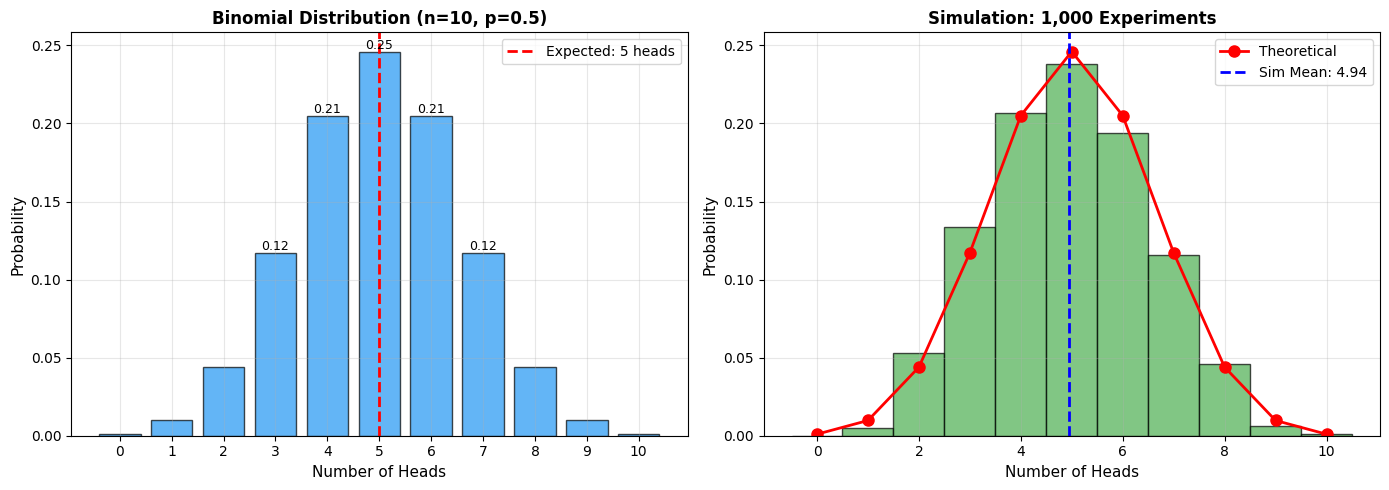


🪙 Coin Flip Analysis:

10 flips, 50% chance of heads each flip

Expected heads: 5
Standard deviation: 1.58

📊 Probabilities:
   → Exactly 5 heads: 24.6%
   → Exactly 7 heads: 11.7%
   → At least 7 heads: 17.2%
   → Between 4-6 heads: 65.6%

✅ In 1,000 simulations:
   → Average heads: 4.94
   → Most common: 5 heads


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Parameters
n_flips = 10
p_heads = 0.5

# Generate binomial distribution
x = np.arange(0, n_flips + 1)
pmf = stats.binom.pmf(x, n_flips, p_heads)

# Simulate 1000 experiments
np.random.seed(42)
simulations = np.random.binomial(n_flips, p_heads, 1000)

# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Theoretical distribution
bars = ax1.bar(x, pmf, color='#2196F3', alpha=0.7, edgecolor='black')
ax1.axvline(n_flips * p_heads, color='red', linestyle='--', linewidth=2, 
           label=f'Expected: {n_flips * p_heads:.0f} heads')
ax1.set_xlabel('Number of Heads', fontsize=11)
ax1.set_ylabel('Probability', fontsize=11)
ax1.set_title(f'Binomial Distribution (n={n_flips}, p={p_heads})', fontsize=12, fontweight='bold')
ax1.set_xticks(x)
ax1.legend()
ax1.grid(alpha=0.3)

# Add probability labels
for i, (bar, prob) in enumerate(zip(bars, pmf)):
    if prob > 0.05:  # Only label significant probabilities
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{prob:.2f}', ha='center', va='bottom', fontsize=9)

# Simulation histogram
ax2.hist(simulations, bins=np.arange(-0.5, n_flips + 1.5, 1), 
        density=True, alpha=0.7, color='#4CAF50', edgecolor='black')
ax2.plot(x, pmf, 'ro-', linewidth=2, markersize=8, label='Theoretical')
ax2.axvline(np.mean(simulations), color='blue', linestyle='--', linewidth=2,
           label=f'Sim Mean: {np.mean(simulations):.2f}')
ax2.set_xlabel('Number of Heads', fontsize=11)
ax2.set_ylabel('Probability', fontsize=11)
ax2.set_title('Simulation: 1,000 Experiments', fontsize=12, fontweight='bold')
ax2.legend()
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n🪙 Coin Flip Analysis:")
print(f"\n{n_flips} flips, {p_heads:.0%} chance of heads each flip")
print(f"\nExpected heads: {n_flips * p_heads:.0f}")
print(f"Standard deviation: {np.sqrt(n_flips * p_heads * (1-p_heads)):.2f}")

print(f"\n📊 Probabilities:")
print(f"   → Exactly 5 heads: {pmf[5]:.1%}")
print(f"   → Exactly 7 heads: {pmf[7]:.1%}")
print(f"   → At least 7 heads: {sum(pmf[7:]):.1%}")
print(f"   → Between 4-6 heads: {sum(pmf[4:7]):.1%}")

print(f"\n✅ In 1,000 simulations:")
print(f"   → Average heads: {np.mean(simulations):.2f}")
print(f"   → Most common: {stats.mode(simulations, keepdims=True).mode[0]} heads")

## Real-World Example: Email Campaign

Send 100 emails with 30% open rate. How many opens?

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

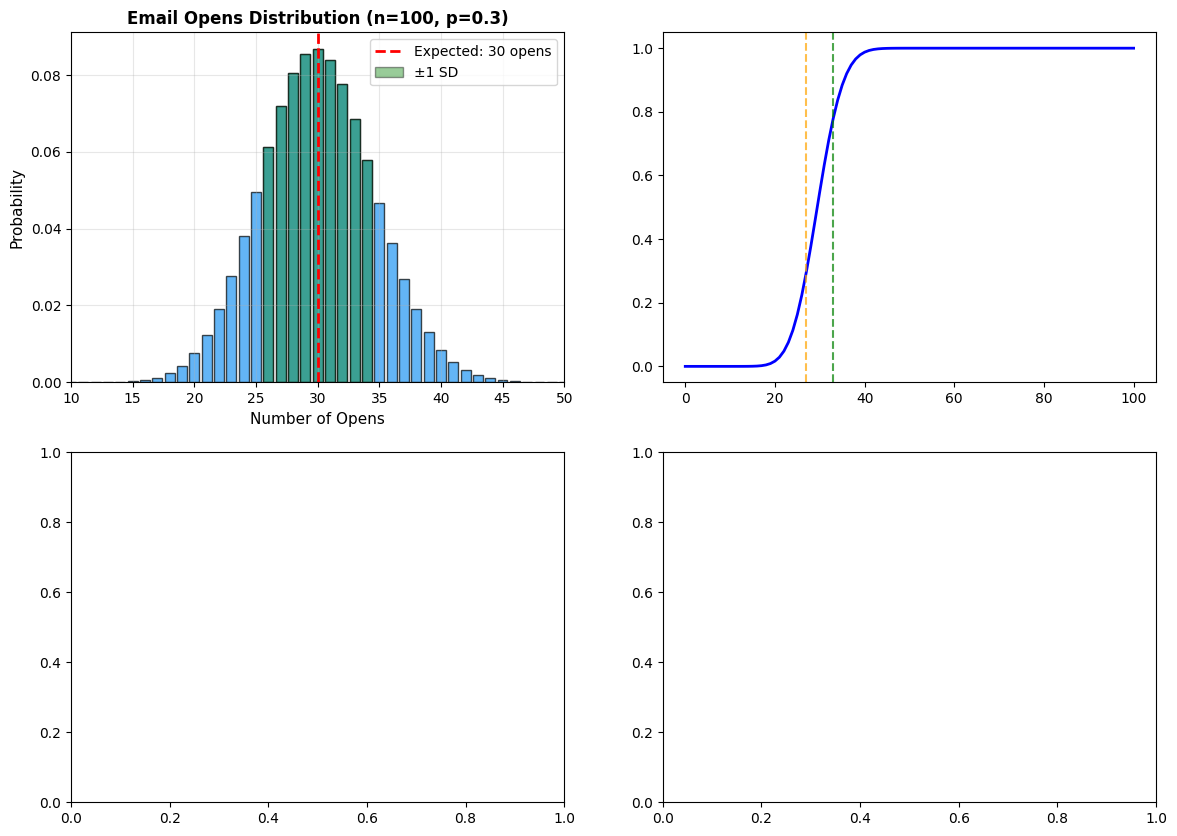

In [2]:
# Email campaign parameters
n_emails = 100
p_open = 0.30

# Generate distribution
x_emails = np.arange(0, n_emails + 1)
pmf_emails = stats.binom.pmf(x_emails, n_emails, p_open)
cdf_emails = stats.binom.cdf(x_emails, n_emails, p_open)

expected_opens = n_emails * p_open
sd_opens = np.sqrt(n_emails * p_open * (1 - p_open))

# Simulate 10 campaigns
np.random.seed(42)
campaigns = np.random.binomial(n_emails, p_open, 10)

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# PMF
ax1 = axes[0, 0]
ax1.bar(x_emails, pmf_emails, color='#2196F3', alpha=0.7, edgecolor='black')
ax1.axvline(expected_opens, color='red', linestyle='--', linewidth=2, 
           label=f'Expected: {expected_opens:.0f} opens')
# Shade ±1 SD
x_1sd = x_emails[(x_emails >= expected_opens - sd_opens) & (x_emails <= expected_opens + sd_opens)]
pmf_1sd = stats.binom.pmf(x_1sd, n_emails, p_open)
ax1.bar(x_1sd, pmf_1sd, color='green', alpha=0.4, edgecolor='black', label='±1 SD')
ax1.set_xlabel('Number of Opens', fontsize=11)
ax1.set_ylabel('Probability', fontsize=11)
ax1.set_title(f'Email Opens Distribution (n={n_emails}, p={p_open})', fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(alpha=0.3)
ax1.set_xlim(10, 50)

# CDF for planning
ax2 = axes[0, 1]
ax2.plot(x_emails, cdf_emails, 'b-', linewidth=2)
# Mark key percentiles
percentile_25 = np.searchsorted(cdf_emails, 0.25)
percentile_75 = np.searchsorted(cdf_emails, 0.75)
ax2.axvline(percentile_25, color='orange', linestyle='--', alpha=0.7, label=f'25th %ile: {percentile_25}')
ax2.axvline(percentile_75, color='green', linestyle='--', alpha=0.7, label=f'75th %ile: {percentile_75}')
ax2.axhline([0.25, 0.75], color='gray', linestyle=':', alpha=0.3)
ax2.set_xlabel('Number of Opens', fontsize=11)
ax2.set_ylabel('Cumulative Probability', fontsize=11)
ax2.set_title('Cumulative Distribution', fontsize=12, fontweight='bold')
ax2.legend()
ax2.grid(alpha=0.3)
ax2.set_xlim(10, 50)

# Campaign simulation
ax3 = axes[1, 0]
campaign_nums = np.arange(1, len(campaigns) + 1)
ax3.bar(campaign_nums, campaigns, color='#4CAF50', alpha=0.7, edgecolor='black')
ax3.axhline(expected_opens, color='red', linestyle='--', linewidth=2, 
           label=f'Expected: {expected_opens:.0f}')
ax3.set_xlabel('Campaign Number', fontsize=11)
ax3.set_ylabel('Opens', fontsize=11)
ax3.set_title('10 Simulated Campaigns', fontsize=12, fontweight='bold')
ax3.set_xticks(campaign_nums)
ax3.legend()
ax3.grid(axis='y', alpha=0.3)

# Business scenarios
ax4 = axes[1, 1]
scenarios = ['< 25 opens\n(poor)', '25-30 opens\n(below avg)', 
            '30-35 opens\n(on target)', '> 35 opens\n(great)']
thresholds = [25, 30, 35]
scenario_probs = [
    cdf_emails[24],
    cdf_emails[29] - cdf_emails[24],
    cdf_emails[34] - cdf_emails[29],
    1 - cdf_emails[34]
]
colors_scenarios = ['#F44336', '#FF9800', '#8BC34A', '#4CAF50']
bars = ax4.bar(range(len(scenarios)), scenario_probs, color=colors_scenarios, 
              alpha=0.7, edgecolor='black')
ax4.set_xticks(range(len(scenarios)))
ax4.set_xticklabels(scenarios, fontsize=9)
ax4.set_ylabel('Probability', fontsize=11)
ax4.set_title('Performance Scenarios', fontsize=12, fontweight='bold')
ax4.grid(axis='y', alpha=0.3)
for bar, val in zip(bars, scenario_probs):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height,
            f'{val:.1%}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n📧 Email Campaign Analysis:")
print(f"\nCampaign: {n_emails} emails, {p_open:.0%} open rate")
print(f"\nExpected opens: {expected_opens:.0f}")
print(f"Standard deviation: {sd_opens:.2f}")
print(f"Typical range (±1 SD): {expected_opens - sd_opens:.0f} to {expected_opens + sd_opens:.0f} opens")

print(f"\n💡 Planning insights:")
prob_at_least_25 = 1 - cdf_emails[24]
prob_at_least_35 = 1 - cdf_emails[34]
prob_20_to_40 = cdf_emails[39] - cdf_emails[19]
print(f"   → {prob_at_least_25:.0%} chance of ≥25 opens")
print(f"   → {prob_at_least_35:.0%} chance of ≥35 opens")
print(f"   → {prob_20_to_40:.0%} of campaigns get 20-40 opens")

print(f"\n🎯 Business decisions:")
print(f"   → Budget for ~{expected_opens:.0f} follow-up actions")
print(f"   → Staff can handle {expected_opens + 2*sd_opens:.0f} opens (97.5th percentile)")
print(f"\n📊 In 10 simulations:")
print(f"   → Range: {campaigns.min()} to {campaigns.max()} opens")
print(f"   → Average: {campaigns.mean():.1f} opens")

## Summary: Binomial Distribution

### When to Use
- **Fixed trials:** Know n in advance (10 flips, 100 emails)
- **Two outcomes:** Success/failure, yes/no, click/no-click
- **Same probability:** p doesn't change across trials
- **Independence:** Each trial doesn't affect others

### Key Formulas
- **Mean:** μ = n × p
- **Variance:** σ² = n × p × (1-p)
- **Standard Deviation:** σ = √(n × p × (1-p))

### Real-World Applications
- **A/B Testing:** Out of 1000 users, how many convert?
- **Quality Control:** Out of 100 products, how many are defective?
- **Marketing:** Out of 500 emails, how many clicks?
- **Sales:** Out of 20 calls, how many sales?

### Important Notes
- As n gets large, binomial approaches normal distribution
- Most likely outcome near n × p, but rarely exactly that
- Variability increases with sample size: larger n = wider spread

**Remember:** Binomial answers "How many successes in n tries?"